In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
conn = sqlite3.connect("../db.sqlite3")
query = """
SELECT 
    restaurant_orderitem.order_id, restaurant_orderitem.quantity, restaurant_order.datetime, restaurant_product.price, restaurant_product.name
FROM 
    restaurant_orderitem
INNER JOIN 
    restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
INNER JOIN 
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""

data = pd.read_sql_query(query, conn)

data.to_csv("restaurant_order.csv", index=False)

conn.close()

data = pd.read_csv("restaurant_order.csv")

data

,order_id,quantity,datetime,price,name
0,1,2,2019-08-03 20:25:00,0.80,Plain Papadum
1,1,1,2019-08-03 20:25:00,12.95,King Prawn Balti
2,1,1,2019-08-03 20:25:00,2.95,Garlic Naan
3,1,1,2019-08-03 20:25:00,3.95,Mushroom Rice
4,1,1,2019-08-03 20:25:00,8.95,Paneer Tikka Masala
...,...,...,...,...,...
74813,3255,2,2016-05-18 18:53:00,17.95,House Red wine 75cl
74814,12905,2,2016-05-14 19:28:00,17.95,House Red wine 75cl
74815,3272,2,2016-05-10 13:18:00,17.95,House Red wine 75cl
74816,11404,1,2016-04-07 19:04:00,17.95,House white wine 75cl


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

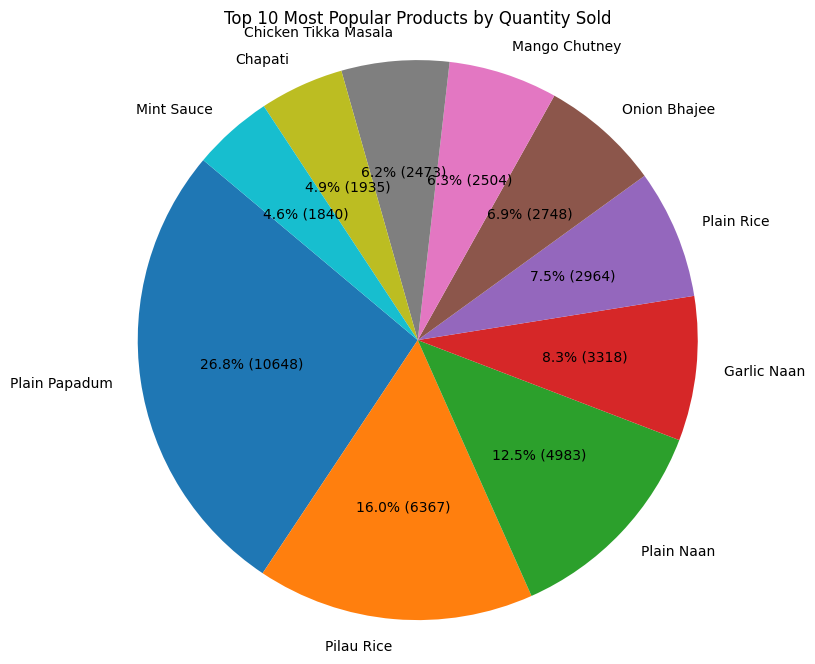

In [58]:
product_quantity = data.groupby("name")["quantity"].sum().reset_index()

top_10_products = product_quantity.sort_values(by="quantity", ascending=False).head(10)
top_10_products["percentage"] = (
    top_10_products["quantity"] / top_10_products["quantity"].sum()
) * 100

plt.figure(figsize=(10, 8))
plt.pie(
    top_10_products["quantity"],
    labels=top_10_products["name"],
    autopct=lambda pct: f"{pct:.1f}% ({int(pct * sum(top_10_products['quantity']) / 100)})",
    startangle=140,
)
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.axis("equal")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

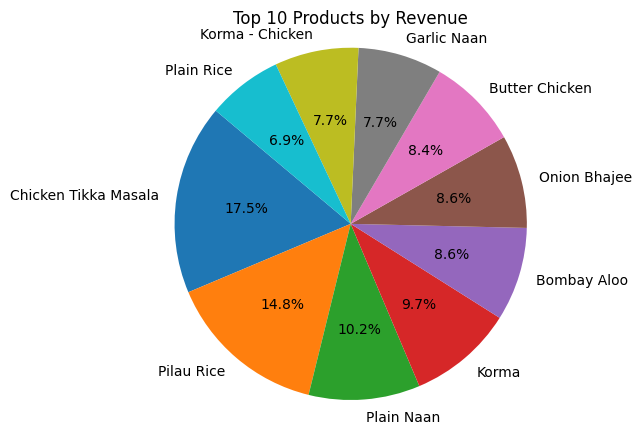

In [36]:
data["item_price"] = data["price"] * data["quantity"]

product_revenue = data.groupby("name")["item_price"].sum().reset_index()

top_10_revenue_products = product_revenue.sort_values(
    by="item_price", ascending=False
).head(10)
top_10_revenue_products["percentage"] = (
    top_10_revenue_products["item_price"] / top_10_revenue_products["item_price"].sum()
) * 100

plt.figure(figsize=(5, 5))
plt.pie(
    top_10_revenue_products["percentage"],
    labels=top_10_revenue_products["name"],
    autopct="%1.1f%%",
    startangle=140,
)
plt.title("Top 10 Products by Revenue")
plt.axis("equal")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

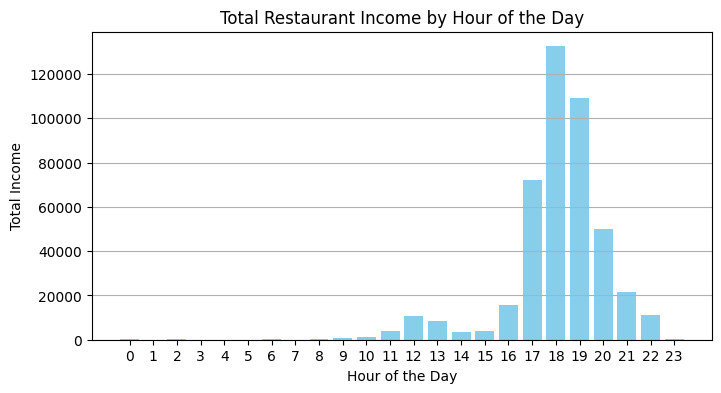

In [30]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["order_hour"] = data["datetime"].dt.hour

income_by_hour = data.groupby("order_hour")["item_price"].sum().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(income_by_hour["order_hour"], income_by_hour["item_price"], color="skyblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Hour of the Day")
plt.xticks(range(24))
plt.grid(axis="y")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

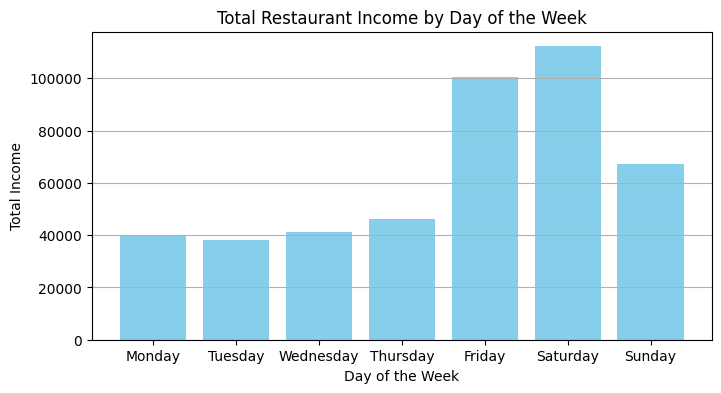

In [34]:
data["order_day_of_week"] = data["datetime"].dt.day_name()

income_by_day = data.groupby("order_day_of_week")["item_price"].sum().reset_index()

ordered_days = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
income_by_day["order_day_of_week"] = pd.Categorical(
    income_by_day["order_day_of_week"], categories=ordered_days, ordered=True
)
income_by_day = income_by_day.sort_values("order_day_of_week")

plt.figure(figsize=(8, 4))
plt.bar(
    income_by_day["order_day_of_week"], income_by_day["item_price"], color="skyblue"
)
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income by Day of the Week")
plt.grid(axis="y")
plt.show()